# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [4]:
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

## Parte 1

### _Setup_ da parte 1

In [6]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binom": sct.binom.rvs(100, 0.2, size=10000)})
df = dataframe

## Inicie sua análise a partir da parte 1 a partir daqui

In [5]:
# Sua análise da parte 1 começa aqui.
df.head()

,normal,binom
0,21.986857,18
1,19.446943,15
2,22.590754,14
3,26.092119,15
4,19.063387,21


In [25]:
df.shape

(10000, 2)

In [26]:
df.columns

Index(['normal', 'binom'], dtype='object')

In [27]:
#sns.distplot(df['normal'])
#plt.show()

In [28]:
#sns.distplot(df['binom'])
#plt.show()

## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [29]:
def q1():
    # Retorne aqui o resultado da questão 1.
    q = df['normal'].quantile([0.25, 0.5, 0.75]) - df['binom'].quantile([0.25, 0.5, 0.75])
    return tuple(q.round(3).to_list())

Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [30]:
def q2():
    # Retorne aqui o resultado da questão 2.
    ecdf = ECDF(df['normal'].values)
    prob = list (ecdf([df['normal'].mean() - df['normal'].std(), df['normal'].mean() + df['normal'].std()]))
    return (prob[1] - prob[0]).round(3)
    pass


Para refletir:

* Esse valor se aproxima do esperado teórico?
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [31]:
def q3():
    # Retorne aqui o resultado da questão 3.
    m_binom = df['binom'].mean()
    m_norm = df['normal'].mean()
    v_binom = df['binom'].var()
    v_norm = df['normal'].var()
    mean_dif = m_binom - m_norm
    var_dif = v_binom - v_norm
    return (round(mean_dif, 3), round(var_dif, 3))

Para refletir:

* Você esperava valore dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

## Parte 2

### _Setup_ da parte 2

In [6]:
stars = pd.read_csv("pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [13]:
# Sua análise da parte 2 começa aqui.


In [5]:
stars.head()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,False
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,False
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,False
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,False
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,False


In [6]:
stars.shape

(17897, 9)

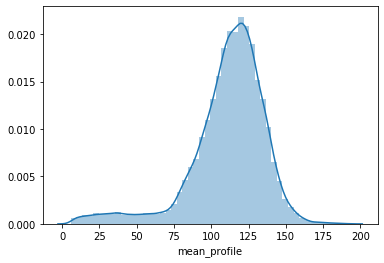

In [7]:
'''
%matplotlib inline
sns.distplot(stars['mean_profile'])
plt.show()
'''

In [7]:
stars['target'].value_counts()

False    16258
True      1639
Name: target, dtype: int64

In [8]:
# Filtrando os valores pedidos
x = stars[stars['target'] == 0]['mean_profile']
x.head()
x = x.sort_values().values

# Calculado a média e o desvio padrão para fazer a padronização
xMean = x.mean()
xStd = x.std()

In [9]:
# Função para padronizar
padr = lambda x: (x - xMean)/xStd

In [10]:
# Padronizando os dados filtrados
xPadron = padr(x)

In [11]:
# Construindo um vetor de distribuição de função cdf
x1 = np.linspace(0, 1, len(xPadron))

In [12]:
# Construindo um dataframe com os valores antigos dos dados filtrados, dados pradonizados e sua respectiva probabilidade
df1 = pd.DataFrame({'x_antigo': x, 'x': xPadron, 'probabilidade': x1})

In [13]:
# Calculando o quantis da função teórica, como pedido pelo enunciado
quantisTeorico = sct.norm.ppf([0.8, 0.9, 0.95], loc=0, scale=1)
quantisTeorico

array([0.84162123, 1.28155157, 1.64485363])

In [14]:
df1.head()

,x_antigo,x,probabilidade
0,17.210938,-5.685309,0.000000
1,27.601562,-5.090707,0.000062
2,33.210938,-4.769711,0.000123
3,33.398438,-4.758981,0.000185
4,34.585938,-4.691027,0.000246


In [15]:
# Calculando a probabilidade de acordo com os quantis teóricos

prob0 = float(df1[df1['x'] >= quantisTeorico[0]]['probabilidade'].head(1).round(3).values)
prob1 = float(df1[df1['x'] >= quantisTeorico[1]]['probabilidade'].head(1).round(3).values)
prob2 = float(df1[df1['x'] >= quantisTeorico[2]]['probabilidade'].head(1).round(3).values)
probab = (prob0, prob1, prob2)
probab

(0.806, 0.911, 0.959)

In [16]:
# Calculando os quantis teoricos
quantisTeorico2 = sct.norm.ppf([0.25, 0.5, 0.75], loc=0, scale=1)
quantisTeorico2

array([-0.67448975,  0.        ,  0.67448975])

In [17]:
# Calculando os quantis do dado padronizado
quantis = df1['x'].quantile([0.25, 0.5, 0.75]).values

In [18]:
dif = quantis - quantisTeorico2
tuple(dif.round(3))

(0.027, 0.04, -0.004)

## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [7]:
def q4():
    # Retorne aqui o resultado da questão 4.
    # Filtrando os valores pedidos
    x = stars[stars['target'] == 0]['mean_profile']
    x.head()
    x = x.sort_values().values

    # Calculado a média e o desvio padrão para fazer a padronização
    xMean = x.mean()
    xStd = x.std()
    
    # Função para padronizar
    padr = lambda x: (x - xMean)/xStd
    # Padronizando os dados filtrados
    xPadron = padr(x)
    
    # Construindo um vetor de distribuição de função cdf
    x1 = np.linspace(0, 1, len(xPadron))
    
    # Construindo um dataframe com os valores antigos dos dados filtrados, dados pradonizados e sua respectiva probabilidade
    df1 = pd.DataFrame({'x_antigo': x, 'x': xPadron, 'probabilidade': x1})
    
    # Calculando o quantis da função teórica, como pedido pelo enunciado
    quantisTeorico = sct.norm.ppf([0.8, 0.9, 0.95], loc=0, scale=1)
    
    # Calculando a probabilidade de acordo com os quantis teóricos
    prob0 = float(df1[df1['x'] >= quantisTeorico[0]]['probabilidade'].head(1).round(3).values)
    prob1 = float(df1[df1['x'] >= quantisTeorico[1]]['probabilidade'].head(1).round(3).values)
    prob2 = float(df1[df1['x'] >= quantisTeorico[2]]['probabilidade'].head(1).round(3).values)
    return (prob0, prob1, prob2)  
    

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [1]:
def q5():
    # Retorne aqui o resultado da questão 5.
    quantis = df1['x'].quantile([0.25, 0.5, 0.75]).values
    
    # Calculando os quantis teoricos
    quantisTeorico2 = sct.norm.ppf([0.25, 0.5, 0.75], loc=0, scale=1)
    
    
    dif = quantis - quantisTeorico2
    return tuple(dif.round(3))

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.